# 군집화
    - 비지도 학습
        유사 개체들끼리 군집화하는 것.
        그룹 내 차이를 줄이고 그룹 간 차이는 최대화해서 대표성을 찾는 원리로 구현
## 비계층적 군집화
- 중심 기반 K-means (유사한 데이터는 중심점을 기반으로 분포할 것이다.)
- 밀도 기반 DBscan (유사한 데이터는 서로 근접하게 분포할 것이다.)
## 계층적 군집화
- 



#### K-means
- 가정 : "유사한 데이터는 중심점을 기반으로 분포할 것이다."
- n개의 데이터와 k개의 중심점이 주어졌을 때, 각 그룹 내의 데이터와 중심점 간의 거리를 최소화하는 방향으로 업데이트 해주면서 그룹화 진행
- 초기 cluster 수 k 설정 
- 목적함수를 최소화하는 것을 목표

출처 : https://yganalyst.github.io/ml/ML_clustering/ 

In [1]:
# 데이터 불러오기
from sklearn import datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns=['Sepal length','Sepal width','Petal length','Petal width']
df = df[['Sepal length', 'Sepal width']].copy()

df.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


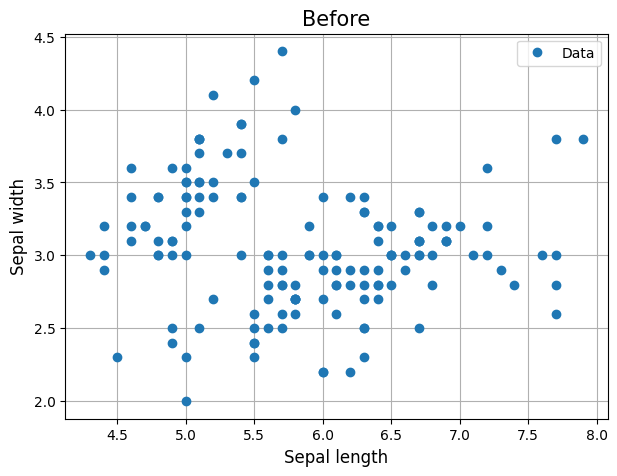

In [2]:
# 시각화
plt.figure(figsize=(7, 5))
plt.title("Before", fontsize=15)
plt.plot(df['Sepal length'], df['Sepal width'], "o", label="Data")
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

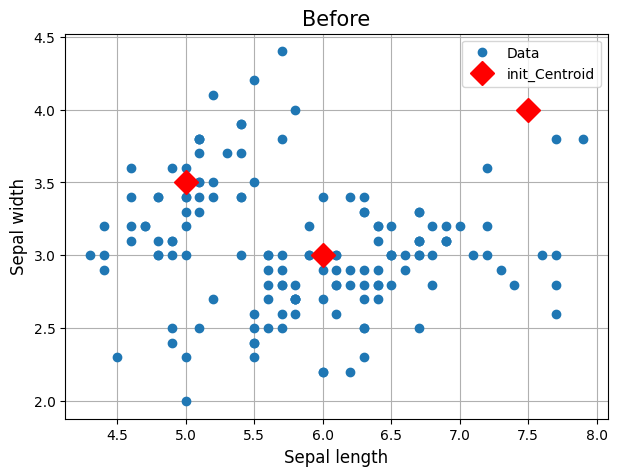

In [3]:
# 중심점 찍고 시각화
x1,y1 = 5, 3.5
x2,y2 = 6, 3
x3,y3 = 7.5, 4

plt.figure(figsize=(7, 5))
plt.title("Before", fontsize=15)
plt.plot(df['Sepal length'], df['Sepal width'], "o", label="Data")
plt.plot([x1,x2,x3], [y1,y2,y3], "rD", markersize=12, label='init_Centroid')
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [12]:
np.array([(x1,y1),(x2,y2),(x3,y3)])

array([[5. , 3.5],
       [6. , 3. ],
       [7.5, 4. ]])

In [4]:
# k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init=np.array([(x1,y1),(x2,y2),(x3,y3)])).fit(df)
df['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

/home/keti/bowon/gradio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/keti/bowon/gradio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
final_centroid

array([[5.00392157, 3.40980392],
       [5.8       , 2.7       ],
       [6.82391304, 3.07826087]])

In [6]:
final_centroid[:,0]

array([5.00392157, 5.8       , 6.82391304])

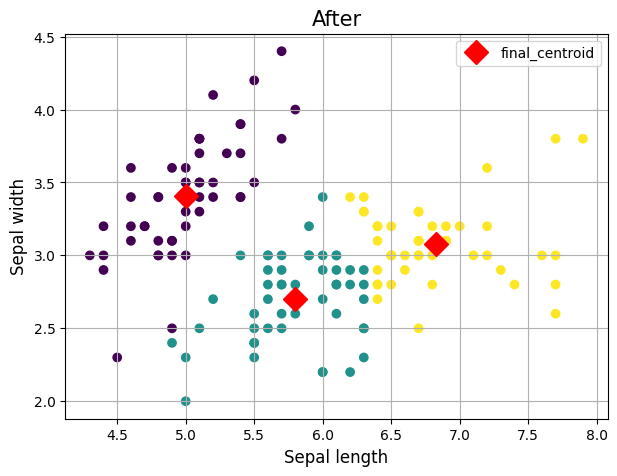

In [8]:
plt.figure(figsize=(7,5))
plt.title("After", fontsize=15)
plt.scatter(df['Sepal length'], df['Sepal width'], c=df['cluster'])
plt.plot(final_centroid[:,0], final_centroid[:,1], "rD", markersize=12, label='final_centroid')
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()
# 중심값이 이동되었다.
# 군집화 완료! 

#### K-means
- 밀도 기반
- 가정 " 유사한 데이터는 서로 근접하게 분포할 것이다."
- 용어
    - minPts: 반경 내 최소 개체(point) 수
    - eps(epsilon) : 군집화할 반경
    - Core : 중심점(minPts를 만족할 경우)
    - Border : 경계점(minPts를 만족하지 않지만, 어느 Core 반경에 속한 경우)

In [ ]:
https://julie-tech.tistory.com/31#google_vignette

In [11]:
os.getcwd()

'/home/keti/bowon/monitoring/module/fastapi2'

In [13]:
os.listdir()

['train_manager.py',
 'appblip.py',
 'log.out',
 'video',
 'index.html',
 'static',
 'resource_manager.py',
 'infer_manager.py',
 'flagged',
 'mainapp.py',
 'labels',
 '__pycache__',
 'weights',
 'apps.py',
 'videos',
 'sample',
 'clustering.ipynb']

In [20]:
import os, shutil
if os.path.exists('./train') == True:
    shutil.rmtree('./train')
if os.path.exists('./val') == True:
    shutil.rmtree('./val')
if os.path.exists('./test') == True:
    shutil.rmtree('./test')

if os.path.exists('./images') == True:
    shutil.rmtree('./images')
if os.path.exists('./labels') == True:
    shutil.rmtree('./labels')

In [19]:
os.makedirs('./train/images', exist_ok=True)
os.makedirs('./train/labels', exist_ok=True)
os.makedirs('./val/images', exist_ok=True)
os.makedirs('./val/labels', exist_ok=True)

In [3]:
import nltk 

user = 'cat, Bear'
tkns = nltk.word_tokenize(user.lower())
tkns


['cat', ',', 'bear']

["'cat'", "'dpg'"]

In [1]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import gradio as gr

def same(x):
    xx = text_to_word_sequence(x)

    return xx

with gr.Blocks() as demo:
    user = gr.Textbox()
    answer = gr.Textbox()
    btn = gr.Button()
    btn.click(same, user, answer)
    print(answer.value) 

demo.launch()
    

2024-01-19 16:52:42.145794: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-19 16:52:42.146841: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 16:52:42.167141: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 16:52:42.167613: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 16:52:42.522930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [12]:
a = "['head', 'helmet', 'person']"
a = list(a)
print(a)
len(a)

['[', "'", 'h', 'e', 'a', 'd', "'", ',', ' ', "'", 'h', 'e', 'l', 'm', 'e', 't', "'", ',', ' ', "'", 'p', 'e', 'r', 's', 'o', 'n', "'", ']']


28

In [6]:
import zipfile, io, requests
def testzip(file):

    if ('http' in file):
        ri = requests.get(file)
        zi = zipfile.ZipFile(io.BytesIO(ri.content))
        zi.extractall("./testzip")

    # Local 
    else:
        with zipfile.ZipFile(file, 'r') as z:
            z.extractall("./testzip")

In [7]:
testzip('./testzip.zip')

In [2]:
from py7zr import unpack_7zarchive
import shutil
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
shutil.unpack_archive('testzip.7z', './ttt')

In [17]:
shutil.unpack_archive('testzip.zip', './ttt')

In [6]:
# 얘는 폴더 .. 
from py7zr import unpack_7zarchive
import shutil
shutil.unpack_archive('test124.tar.gz', './images')

In [3]:
import os
os.getcwd()

'/home/keti/bowon/monitoring/module'

In [2]:
import tarfile

tarfile.open('./test124.tar.gz').extractall('./')

In [11]:
import os 

filename, file_extension = os.path.splitext('./testzip.tar.gz')

print(filename, file_extension)

./testzip.tar .gz


In [ ]:
filenamei, file_extensioni = os.path.splitext(file_img)

In [49]:
img_ls = []

for parent, a, files in os.walk('./a'):
    for f in files:
        img_ls.append(os.path.join(parent, f))
    print(a)


[]


In [50]:
img_ls

['./a/refresh_btn.JPG', './a/metrics.JPG']

In [4]:
import os
current_dir = os.getcwd()
tb_classname = ['hair', 'cat']

In [5]:
config = {'names': tb_classname, 'nc': len(tb_classname), 'path': current_dir, 'train': './traidfimages', 'val': './val/iamges'}
config['test'] = './test/images'
config


{'names': ['hair', 'cat'],
 'nc': 2,
 'path': '/home/keti/bowon/monitoring/module/fastapi2',
 'train': './traidfimages',
 'val': './val/iamges',
 'test': './test/images'}

In [6]:
import yaml
with open('yolotrain.yaml', 'w') as file:
    yaml.dump(config, file, default_flow_style=False)

In [48]:
for a in img_ls:
    shutil.move(, './a')

In [69]:
img_ls = []
label_ls = []
for parent, _, files in os.walk('./images'):
    for f in files:
        img_ls.append(os.path.join(parent, f))

for parent, _, files, in os.walk('./labels'):
    for f in files:
        label_ls.append(os.path.join(parent, f))

In [78]:
img_ls

['./images/005301_jpg.rf.c9590992f2ae3693821268735bc7191b.jpg',
 './images/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.jpg',
 './images/005306_jpg.rf.e9b5a6f822ddd706beaf31f4f7e28774.jpg',
 './images/005307_jpg.rf.bcf762f66f44aec4ee26db4e7c1a7b10.jpg',
 './images/005305_jpg.rf.cc70e441d27288b3761f8807afc6365a.jpg',
 './images/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.jpg',
 './images/005303_jpg.rf.d4f4bb573b03c1b0aae2de22ff905b8f.jpg',
 './images/005302_jpg.rf.3f9ff0dcbfa01ac541e96d7aa79685ff.jpg',
 './images/005304_jpg.rf.7337fb757c88c6e91ce4b2575d5bd31c.jpg',
 './images/005300_jpg.rf.419d88422f77db5d30bbb0e769c7c600.jpg']

In [84]:
a = ['1', 'b', 'c', 'd', '2']
sorted(a)

['1', '2', 'b', 'c', 'd']

In [85]:
a

['1', 'b', 'c', 'd', '2']

In [75]:
from sklearn.model_selection import train_test_split
test_N = 33
X_train, X_test, y_train, y_test = train_test_split(img_ls, label_ls, test_size=test_N/100, random_state=2024)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

['./images/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.jpg', './images/005305_jpg.rf.cc70e441d27288b3761f8807afc6365a.jpg', './images/005307_jpg.rf.bcf762f66f44aec4ee26db4e7c1a7b10.jpg', './images/005300_jpg.rf.419d88422f77db5d30bbb0e769c7c600.jpg', './images/005301_jpg.rf.c9590992f2ae3693821268735bc7191b.jpg', './images/005304_jpg.rf.7337fb757c88c6e91ce4b2575d5bd31c.jpg']
['./labels/005307_jpg.rf.bcf762f66f44aec4ee26db4e7c1a7b10.txt', './labels/005305_jpg.rf.cc70e441d27288b3761f8807afc6365a.txt', './labels/005301_jpg.rf.c9590992f2ae3693821268735bc7191b.txt', './labels/005303_jpg.rf.d4f4bb573b03c1b0aae2de22ff905b8f.txt', './labels/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.txt', './labels/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.txt']
['./images/005306_jpg.rf.e9b5a6f822ddd706beaf31f4f7e28774.jpg', './images/005302_jpg.rf.3f9ff0dcbfa01ac541e96d7aa79685ff.jpg', './images/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.jpg', './images/005303_jpg.rf.d4f4bb573b03c1b0aae2de22ff90

['./images/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.jpg', './images/005303_jpg.rf.d4f4bb573b03c1b0aae2de22ff905b8f.jpg', './images/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.jpg', './images/005305_jpg.rf.cc70e441d27288b3761f8807afc6365a.jpg', './images/005307_jpg.rf.bcf762f66f44aec4ee26db4e7c1a7b10.jpg', './images/005300_jpg.rf.419d88422f77db5d30bbb0e769c7c600.jpg', './images/005301_jpg.rf.c9590992f2ae3693821268735bc7191b.jpg', './images/005304_jpg.rf.7337fb757c88c6e91ce4b2575d5bd31c.jpg']


In [2]:
import pandas as pd
df = pd.read_csv('/home/keti/bowon/monitoring/module/fastapi2/metrics/240119_172529/results.csv')
df.columns = [c.strip() for c in df.columns] 

In [4]:
df.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

In [7]:
a = ['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2']

In [11]:
import numpy as np
col = ['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',\
        'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',\
        'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',\
        'lr/pg0', 'lr/pg1', 'lr/pg2']
data = np.ones((1, 14))
df = pd.DataFrame(data, columns=col)
df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
b = ['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2']

In [10]:
if a==b:
    print('t')

t


In [ ]:
z = 

#### progress bar
- https://www.gradio.app/guides/key-features

In [ ]:
import gradio as gr
import time

def slowly_reverse(word, progress=gr.Progress()):
    progress(0, desc="Starting")
    time.sleep(1)
    progress(0.05)
    new_string = ""
    for letter in progress.tqdm(word, desc="Reversing"):
        time.sleep(0.25)
        new_string = letter + new_string
    return new_string

demo = gr.Interface(slowly_reverse, gr.Text(), gr.Text())

demo.launch()

In [ ]:
import torch
from diffusers import DiffusionPipeline
import gradio as gr

generator = DiffusionPipeline.from_pretrained("CompVis/ldm-text2im-large-256")
# move to GPU if available
if torch.cuda.is_available():
    generator = generator.to("cuda")

def generate(prompts):
  images = generator(list(prompts)).images
  return [images]

demo = gr.Interface(generate, 
             "textbox", 
             "image", 
             batch=True, 
             max_batch_size=4  # Set the batch size based on your CPU/GPU memory
).queue()

if __name__ == "__main__":
    demo.launch()